In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_setup():
    plt.rcParams['text.usetex'] = False
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    plt.rcParams['mathtext.fontset'] = 'cm'
    # plt.rcParams['figure.autolayout'] = 'True'

    sns.set_style('ticks',{'axes.edgecolor': '[0,0,0]',
                           'xtick.direction':'in',
                           'ytick.direction':'in',
                           'ytick.right':'True',
                           'xtick.top':'True',
                           'xtick.color':'k',
                           'ytick.color':'k'
                            })

def diffusion(size,sigma,mu):
    gamma_m = 6*np.pi*0.3*0.01
    gamma = 6*np.pi*mu*0.005*size
    return ((sigma/(gamma_m+gamma))**2)/2


In [3]:
plot_setup()

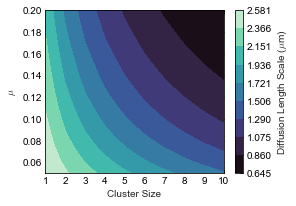

In [4]:
T = 500
sigma = 0.01
mu = np.linspace(0.05,0.2,100)
xx, yy = np.meshgrid(np.arange(1,11),mu)

mini = np.min(np.sqrt(T*diffusion(xx,sigma,yy)).ravel())
maxi = np.max(np.sqrt(T*diffusion(xx,sigma,yy)).ravel())

fig, ax = plt.subplots(1,1,figsize=(4,3))
g = ax.contourf(xx,yy,np.sqrt(T*diffusion(xx,sigma,yy)),cmap=sns.color_palette("mako", as_cmap=True),levels=np.linspace(mini,maxi,10))
cbar = fig.colorbar(g,ax=ax)
cbar.ax.set_ylabel('Diffusion Length Scale ($\mu$m)')
ax.set_xticks(np.arange(1,11))
# ax.set_yticks(np.linspace(mu[0],mu[-1]))
ax.set_xlabel('Cluster Size')
ax.set_ylabel('$\mu$')
fig.savefig('figures/DiffusionLengthScale.pdf',format='pdf')

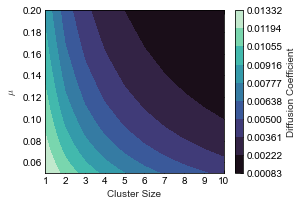

In [5]:
mini = np.min(diffusion(xx,sigma,yy).ravel())
maxi = np.max(diffusion(xx,sigma,yy).ravel())

fig, ax = plt.subplots(1,1,figsize=(4,3))
g = ax.contourf(xx,yy,diffusion(xx,sigma,yy),cmap=sns.color_palette("mako", as_cmap=True),levels=np.linspace(mini,maxi,10))
cbar = fig.colorbar(g,ax=ax)
cbar.ax.set_ylabel('Diffusion Coefficient')
ax.set_xticks(np.arange(1,11))
# ax.set_yticks(np.linspace(mu[0],mu[-1]))
ax.set_xlabel('Cluster Size')
ax.set_ylabel('$\mu$')
fig.savefig('figures/DiffusionCoefficient.pdf',format='pdf')
